# Seattle Airbnb Open Data Exploration
## Section 1: Background
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

This dataset is comprise of the following data:

* Calender data which includes listing ID and the price and availability for that day
* Listings data which includes full descriptions and average review score
* Reviews data which includes a unique ID for each reviewer and detailed comments

This project seeks to explore the Seattle Airbnb open data in order to understand the Seattle Airbnb business.
To do that we will be looking at answering the follwing business questions:

**Question 1: What is the top 10 neighborhoods with the highest listings?**

**Question 2: Which neighborhoods are the top ten most expensive, on average price?**

**Question 3: Based on reviews data, are there any clients that use Seattle Airbnb more than once?**

**Question 4: Based on thye caleder data, what were the price trends over time?**

## Section 2: Understanding Data

To answer all the questions outlined in Section 1, we need to understand the data that we have.

## Section 2: Data Understanding

**Adding packages that we will need to explore data**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



**Gathering Data**

In [23]:
df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

# Data preview
df_listings.head()
df_calendar.head()
df_reviews.head()

# Datasets sizes
df_listings.shape
df_calendar.shape
df_reviews.shape

(84849, 6)

## Section 3: Data Preparation
In this section we are performing data wrangling in order to handle categorical data and missing data accordingly.

In [24]:
def remove_dollarSign(df):
    '''
    This function returns a dataframe with a price that doesn't have a $ sign and a comma. It also that the price data type to float.

    Parameters:
    df: a raw data dataframe

    Returns:
    df: a dataframe that that contains price (float data type)  without a dollar sign.
    '''
    
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Removing '$' and ',' so we and converting price to float

    return df

# We are removing NaNs on calender dataset price column bebause that when there is not availability.
df_calendar.dropna(subset=['price'], inplace=True) 

## Evaluation
**Question 1: What is the top 10 neighborhoods with the highest listings?**

To answer this question we look at the listings data and count the listing per neighborhood.

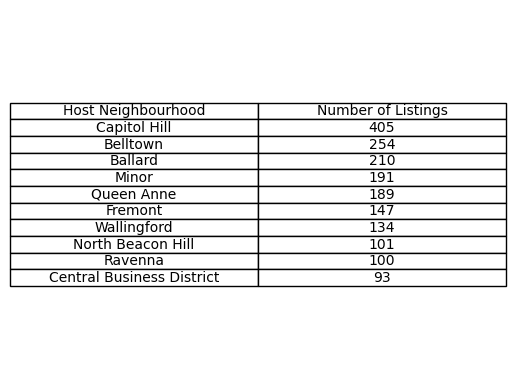

In [25]:
# Group the data by neighborhood and count the number of listings in each neighborhood 
neighborhood_counts = df_listings['host_neighbourhood'].value_counts() 

df = neighborhood_counts.to_frame() 
df = df.rename(columns={'host_neighbourhood': 'Number of Listings'})
df = df.reset_index().rename(columns={'index': 'Host Neighbourhood'})

# Showing the 10 neighborhoods with the highest number of listings 
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=df.head(10).values, colLabels=df.columns, loc='center', cellLoc='center')
plt.show() 

Brief Summary: Out of the top 10, Capitol Hill is the neighborhood with the highest number of listings of all neighborhoods.

**Question 2: Which neighborhoods are the top ten most expensive, on average price?**

To answer this question we look at the listings data and calculate the mean price per neighborhood.


C:\Users\MantenguN\AppData\Local\Temp\ipykernel_60628\1344416554.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Removing '$' and ',' so we and converting price to float


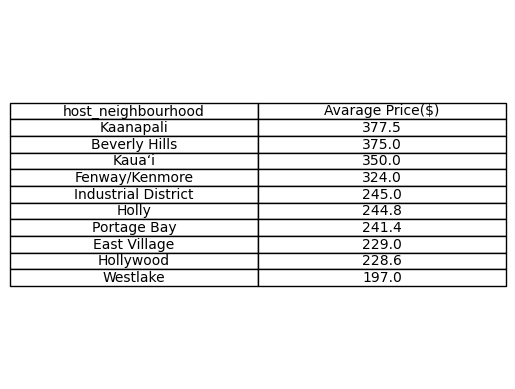

In [26]:

df  = remove_dollarSign(df_listings) # Removing a $ sign and comma, and formating price

# Grouping the data by neighborhood and calculate the average price for each neighborhood
neighborhood_prices = round(df.groupby('host_neighbourhood')['price'].mean(), 1) 

# Sorting the neighborhoods by average price in descending order
sorted_neighborhoods = neighborhood_prices.sort_values(ascending=False) 

# Renaming columns
sorted_neighborhoods = sorted_neighborhoods.to_frame()
sorted_neighborhoods = sorted_neighborhoods.rename(columns={'price': 'Avarage Price($)'})
sorted_neighborhoods = sorted_neighborhoods.reset_index().rename(columns={'index': 'Host Neighbourhood'})

# Showing the top 10 most expensive neighborhoods of average
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=sorted_neighborhoods.head(10).values, colLabels=sorted_neighborhoods.columns, loc='center', cellLoc='center')
plt.show()

Brief Summary: Out of the top 10 expensive neighborhoods, Kaanapali is the most expensive neighborhood on average.



**Question 3: Based on reviews data, are there any clients that use Seattle Airbnb more than once?**

To answer this question we look at the reviews data check for reviwers (id and name) that have more than one review.

In [27]:
duplicates = df_reviews.duplicated(subset=['reviewer_name', 'reviewer_id']).sum() # Clculating the sum of duplicates per reviewer
print("Number of reviews is", df_reviews.shape[0],"and the number of reviewers with more that one review is", duplicates,". Based on reviews, this means that",(duplicates/df_reviews.shape[0])*100,"percent of people use Seattle Airbnb more than once.")


Number of reviews is 84849 and the number of reviewers with more that one review is 9119 . Based on reviews, this means that 10.747327605510966 percent of people use Seattle Airbnb more than once.


**Question 4: Based on thye caleder data, what were the price trends over time?**

To answer this question we look at the calender data and plot the price over time.

C:\Users\MantenguN\AppData\Local\Temp\ipykernel_60628\1344416554.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Removing '$' and ',' so we and converting price to float


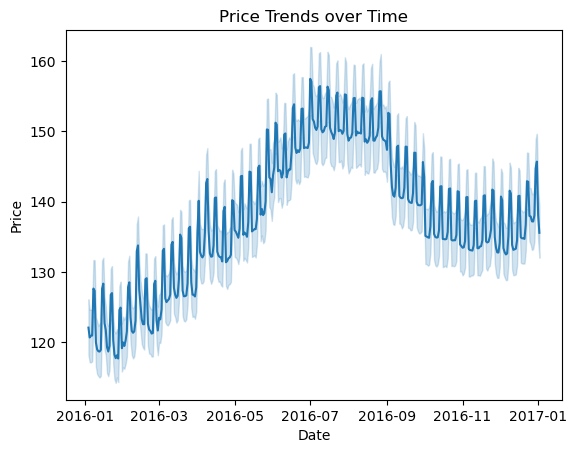

In [28]:
df = df_calendar

# Coverting date to datetime
df['date'] = pd.to_datetime(df['date']) 

# Removing '$' and ',' so we can convert price to float
df = remove_dollarSign(df)

# Plotting price trends of time
sns.lineplot(x='date', y='price', data=df)
plt.title('Price Trends over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Brief Summary: The minimum price was in 2012/01, the maximum price in 2016/07, and prices dropped to moderate between 2016/11 and 2017/01. See the plot below.

